In [1]:

### Dataset

dataset_dict = {}
dataset_dict['MNIST'] = None



### Kernel

kernel_dict = {}
kernel_dict["Gaussian *1"] = None
kernel_dict["Gaussian /2"] = None
kernel_dict["Gaussian *2"] = None
kernel_dict["Laplace *1"] = None
kernel_dict["Laplace /2"] = None
kernel_dict["Laplace *2"] = None


size_list = [10000]

noise_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [2]:
import glob
files = glob.glob("../output/figure8*.txt")
files.sort()

filename = files[-1]

trainers = eval(open(filename, 'r').read())
trainers

{'D:MNIST K:Gaussian *1 S:10000 N:0': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 10000,
  'noise': 0,
  'sgd_ce': 0.027000000000000024,
  'iterations': 6,
  'inv_ce': 0.0266,
  'inv_norm': 188.81133,
  'sgd_norm': 146.75801},
 'D:MNIST K:Gaussian *1 S:10000 N:10': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 10000,
  'noise': 10,
  'sgd_ce': 0.12619999999999998,
  'iterations': 93,
  'inv_ce': 0.1294,
  'inv_norm': 424.34723,
  'sgd_norm': 353.9312},
 'D:MNIST K:Gaussian *1 S:10000 N:20': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 10000,
  'noise': 20,
  'sgd_ce': 0.24039999999999995,
  'iterations': 999999,
  'inv_ce': 0.2516,
  'inv_norm': 613.9932,
  'sgd_norm': 470.4659},
 'D:MNIST K:Gaussian *1 S:10000 N:30': {'dataset': 'MNIST',
  'kernel': 'Gaussian *1',
  'size': 10000,
  'noise': 30,
  'sgd_ce': 0.39039999999999997,
  'iterations': 999999,
  'inv_ce': 0.3702,
  'inv_norm': 710.8618,
  'sgd_norm': 545.9126},
 'D:MNIST K:Gaussian *1 S:1

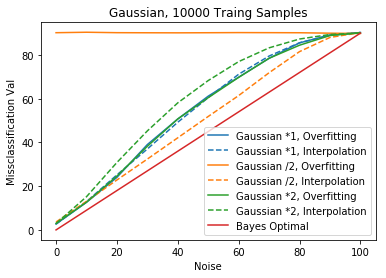

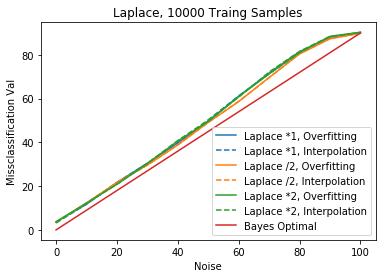

In [5]:
# Noise vs Error

import matplotlib.pyplot as plt
ax = plt.gca()

this_size = size_list[0]

for this_dataset in dataset_dict.keys():    
    
#     for kernel_type in ['Laplace']:
    for kernel_type in ['Gaussian', 'Laplace']:        
        
        ax.set_prop_cycle(None)

        for this_kernel in kernel_dict.keys():
                
            if not kernel_type in this_kernel:
                continue
                
            inv = []
            sgd = []
            noise = []

            for name, trainer in trainers.items():  

                if trainer['dataset'] != this_dataset:
                    continue

                if trainer['size'] != this_size:
                    continue

                if trainer['kernel'] != this_kernel:
                    continue

                sgd.append(trainer['sgd_ce'] * 100)
                inv.append(trainer['inv_ce'] * 100)
                noise.append(trainer['noise'])

            color = next(ax._get_lines.prop_cycler)['color']
            plt.plot(noise, sgd, label=this_kernel + ', Overfitting', color=color) 
            plt.plot(noise, inv, '--', label=this_kernel + ', Interpolation', color=color)     

        
        color = next(ax._get_lines.prop_cycler)['color']
        bayes = [(90) * p / 100 for p in noise_list]
        plt.plot(noise_list, bayes, label='Bayes Optimal', color=color)
            
        plt.title(kernel_type + ', ' + str(this_size) + ' Traing Samples')
        plt.xlabel('Noise')
        plt.ylabel('Missclassification Val')
        plt.legend(loc='lower right')
        
        import matplotlib2tikz
        filename = '../tikz/Figure8_' + kernel_type + '.tex'
        matplotlib2tikz.save(filename)    

        plt.show()

In [4]:
# del trainers